In [1]:
import numpy as np
import lsst.daf.butler as dafButler
import lsst.afw.display as afwDisplay

from pprint import pprint

# Use my custom matplotlib style
import matplotlib.pyplot as plt
%matplotlib widget
import matplotlib.dates as md

import datetime as dt

plt.style.use('~/.config/matplotlib/ed.mplstyle')

Collection and Repo info for frames in project drive

In [2]:
collections=['u/edennihy/E6A_singleFrame']

butler = dafButler.Butler('/project/edennihy/auxtelImagingSurveys/data/')
registry = butler.registry

***
Query to check that the isolated_star_source catalog needed for PA1 landed

In [3]:
datasetRefs = sorted(registry.queryDatasets(datasetType='isolated_star_sources',collections=collections))
print('Found %s isolated_star_source catalogs'%len(datasetRefs))

Found 1 isolated_star_source catalogs


In [4]:
datasetRefs[0]

DatasetRef(DatasetType('isolated_star_sources', {instrument, skymap, tract}, DataFrame), {instrument: 'LATISS', skymap: 'at_discrete_v2', tract: 0}, id=54eefba2-0cb8-4f38-a083-7521f5a0442d, run='isolatedStarAssociation_rerun/20220426T223510Z')

In [5]:
dataid=datasetRefs[0].dataId.full
matchedTable=butler.get('isolated_star_sources', dataId=dataid, collections=collections)
print(matchedTable.columns)

Index(['index', 'sourceId', 'visit', 'detector', 'ra', 'decl',
       'physical_filter', 'band', 'apFlux_12_0_instFlux',
       'apFlux_12_0_instFluxErr', 'x', 'y', 'apFlux_17_0_instFlux',
       'apFlux_17_0_instFluxErr', 'apFlux_17_0_flag', 'psfFlux', 'psfFluxErr',
       'localBackground_instFlux', 'localBackground_flag', 'source_row',
       'obj_index'],
      dtype='object')


In [6]:
matchedTable

,index,sourceId,visit,detector,ra,decl,physical_filter,band,apFlux_12_0_instFlux,apFlux_12_0_instFluxErr,...,y,apFlux_17_0_instFlux,apFlux_17_0_instFluxErr,apFlux_17_0_flag,psfFlux,psfFluxErr,localBackground_instFlux,localBackground_flag,source_row,obj_index
0,8,9,2022021500370,0,221.410404,-44.819617,SDSSi~empty,i,52358.195312,316.841095,...,55.669590,57981.468267,400.743958,False,1.314978e+06,7722.425556,-0.242958,False,8,0
1,12,13,2022021500371,0,221.410400,-44.819618,SDSSi~empty,i,53246.132812,317.898376,...,54.465752,58408.492255,400.711800,False,1.320431e+06,7653.205280,-0.279663,False,12,0
2,63,64,2022021500372,0,221.410404,-44.819620,SDSSi~empty,i,52827.261719,324.759857,...,376.096228,59563.469656,412.557356,False,1.307867e+06,7866.565070,1.216672,False,63,0
3,66,67,2022021500373,0,221.410405,-44.819618,SDSSi~empty,i,51383.277344,322.797791,...,375.544635,58070.319543,412.093534,False,1.317923e+06,8084.880942,0.999569,False,66,0
4,738,739,2022021500467,0,221.410398,-44.819616,SDSSi~empty,i,50900.765625,304.479309,...,3642.377010,57007.712394,381.444379,False,1.267002e+06,7483.341955,0.068351,False,738,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528146,103,104,2022031600719,0,221.867790,-45.085570,SDSSg~empty,g,212389.625000,503.176727,...,770.366621,237263.093195,583.532998,False,6.105111e+06,15900.650601,1.317661,False,103,47014
528147,132,133,2022021700508,0,221.663381,-44.796500,SDSSg~empty,g,4653.184570,262.752533,...,1163.612706,4798.339572,370.268845,False,1.400454e+05,6469.697894,-1.103070,False,132,47015
528148,420,421,2022040500714,0,221.061609,-45.395521,SDSSg~empty,g,6207.295410,216.441177,...,3335.490113,7308.094168,300.761015,False,1.651155e+05,5138.468289,0.095658,False,420,47016
528149,323,324,2022040500295,0,221.458005,-45.660773,SDSSg~empty,g,3049.700439,224.233902,...,3790.052488,3540.588527,315.914782,False,1.007685e+05,6711.785220,-0.825535,False,323,47017


In [7]:
matchedTable[(matchedTable['obj_index']==0) & (matchedTable['band']=='i')]

,index,sourceId,visit,detector,ra,decl,physical_filter,band,apFlux_12_0_instFlux,apFlux_12_0_instFluxErr,...,y,apFlux_17_0_instFlux,apFlux_17_0_instFluxErr,apFlux_17_0_flag,psfFlux,psfFluxErr,localBackground_instFlux,localBackground_flag,source_row,obj_index
0,8,9,2022021500370,0,221.410404,-44.819617,SDSSi~empty,i,52358.195312,316.841095,...,55.669590,57981.468267,400.743958,False,1.314978e+06,7722.425556,-0.242958,False,8,0
1,12,13,2022021500371,0,221.410400,-44.819618,SDSSi~empty,i,53246.132812,317.898376,...,54.465752,58408.492255,400.711800,False,1.320431e+06,7653.205280,-0.279663,False,12,0
2,63,64,2022021500372,0,221.410404,-44.819620,SDSSi~empty,i,52827.261719,324.759857,...,376.096228,59563.469656,412.557356,False,1.307867e+06,7866.565070,1.216672,False,63,0
3,66,67,2022021500373,0,221.410405,-44.819618,SDSSi~empty,i,51383.277344,322.797791,...,375.544635,58070.319543,412.093534,False,1.317923e+06,8084.880942,0.999569,False,66,0
4,738,739,2022021500467,0,221.410398,-44.819616,SDSSi~empty,i,50900.765625,304.479309,...,3642.377010,57007.712394,381.444379,False,1.267002e+06,7483.341955,0.068351,False,738,0
5,732,733,2022021500468,0,221.410404,-44.819620,SDSSi~empty,i,52044.855469,306.365204,...,3640.932422,58492.489296,383.533510,False,1.264225e+06,7441.541286,-0.005556,False,732,0
6,16,17,2022021700471,0,221.410401,-44.819619,SDSSi~empty,i,54898.988281,313.370880,...,82.970435,59999.505963,390.816069,False,1.324032e+06,7358.795149,-0.416068,False,16,0
7,67,68,2022021700482,0,221.410404,-44.819622,SDSSi~empty,i,53571.695312,320.433105,...,373.843773,60408.716404,405.787330,False,1.340798e+06,7844.005878,1.158166,False,67,0
8,79,80,2022021700483,0,221.410397,-44.819625,SDSSi~empty,i,55670.218750,323.479828,...,377.282124,61145.781669,406.807050,False,1.312942e+06,7502.036967,1.155888,False,79,0
9,815,816,2022021700564,0,221.410378,-44.819590,SDSSi~empty,i,48464.589844,306.066681,...,3735.275759,54801.555196,386.064631,False,1.171628e+06,7513.909695,-0.627175,False,815,0


Check to see that PA1 landed after running Faro

In [8]:
datasets = registry.queryDatasetTypes()
for dataset in datasets:
    print(dataset)

DatasetType('bias', {instrument, detector}, ExposureF, isCalibration=True)
DatasetType('camera', {instrument}, Camera, isCalibration=True)
DatasetType('dark', {instrument, detector}, ExposureF, isCalibration=True)
DatasetType('defects', {instrument, detector}, Defects, isCalibration=True)
DatasetType('flat', {band, instrument, detector, physical_filter}, ExposureF, isCalibration=True)
DatasetType('raw', {band, instrument, detector, physical_filter, exposure}, Exposure)
DatasetType('atlas_refcat2_20220201', {htm7}, SimpleCatalog)
DatasetType('gaia_dr2_20200414', {htm7}, SimpleCatalog)
DatasetType('skyMap', {skymap}, SkyMap)
DatasetType('packages', {}, Packages)
DatasetType('isr_config', {}, Config)
DatasetType('postISRCCD', {band, instrument, detector, physical_filter, exposure}, Exposure)
DatasetType('isr_metadata', {band, instrument, detector, physical_filter, exposure}, TaskMetadata)
DatasetType('isr_log', {band, instrument, detector, physical_filter, exposure}, ButlerLogRecords)
Dat

***
Take a closer look at matchedTable to see how many counts per matched object we have (i.e. how many detections per object are going into the PA1 metric)

In [9]:
matchedTableGroup = matchedTable.copy()
matchedTableGroup.groupby('obj_index')

In [10]:
matchedTableGroup.aggregate(np.count_nonzero)

index                       528151
sourceId                    528151
visit                       528151
detector                         0
ra                          528151
decl                        528151
physical_filter             528151
band                        528151
apFlux_12_0_instFlux        528151
apFlux_12_0_instFluxErr     528151
x                           528151
y                           528151
apFlux_17_0_instFlux        528151
apFlux_17_0_instFluxErr     528151
apFlux_17_0_flag                 0
psfFlux                     528151
psfFluxErr                  528151
localBackground_instFlux    528151
localBackground_flag             0
source_row                  528151
obj_index                   528082
dtype: int64

In [11]:
obj_counts = matchedTableGroup.groupby('obj_index').aggregate({'psfFlux':[np.count_nonzero]})

In [12]:
obj_counts.columns = obj_counts.columns.get_level_values(1)

In [13]:
obj_counts

,count_nonzero
obj_index,
0,69
1,60
2,44
3,40
4,61
...,...
47014,1
47015,1
47016,1


In [14]:
obj_with_single_detection = obj_counts.index[[obj_counts['count_nonzero']==1]].values

/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-4.0.0/lib/python3.10/site-packages/pandas/core/indexes/base.py:5055: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [15]:
len(obj_with_single_detection)

4031

In [16]:
obj_counts_g = matchedTableGroup[matchedTableGroup['band']=='g'].groupby('obj_index').aggregate({'psfFlux':[np.count_nonzero]})

In [17]:
obj_counts_r = matchedTableGroup[matchedTableGroup['band']=='r'].groupby('obj_index').aggregate({'psfFlux':[np.count_nonzero]})
obj_counts_i = matchedTableGroup[matchedTableGroup['band']=='i'].groupby('obj_index').aggregate({'psfFlux':[np.count_nonzero]})

***
Generate histogram of counts per objects per filter

(array([   0., 5432., 5539., 4839., 5758., 4957., 5601., 2882., 2765.,
        1706., 1472.,  576.,  399.,  269.,  159.,   96.,   47.,   22.,
          22.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [<matplotlib.patches.Polygon at 0x7f61676c3820>])

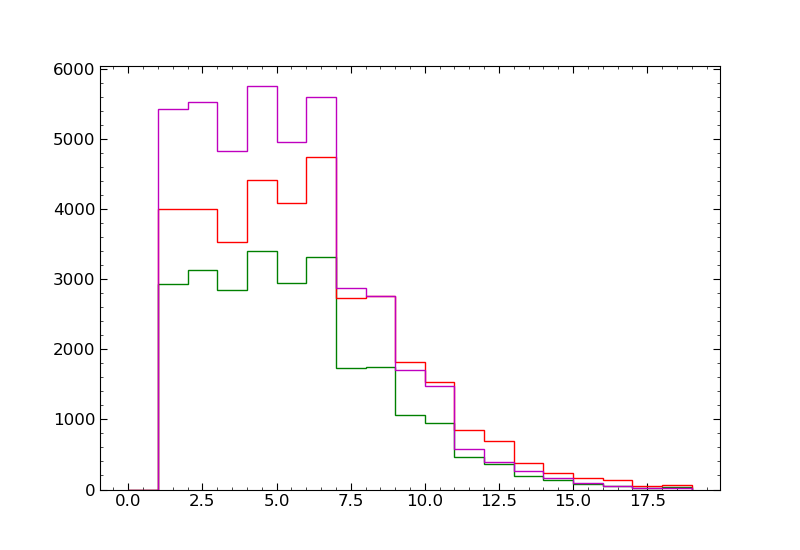

In [18]:
plt.figure()
plt.hist(obj_counts_g,bins=np.arange(0,20),histtype='step',color='g')
plt.hist(obj_counts_r,bins=np.arange(0,20),histtype='step',color='r')
plt.hist(obj_counts_i,bins=np.arange(0,20),histtype='step',color='m')

(array([   0., 2934., 3127., 2848., 3402., 2952., 3316., 1737., 1749.,
        1065.,  952.,  463.,  360.,  190.,  136.,   82.,   49.,   28.,
          30.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <BarContainer object of 19 artists>)

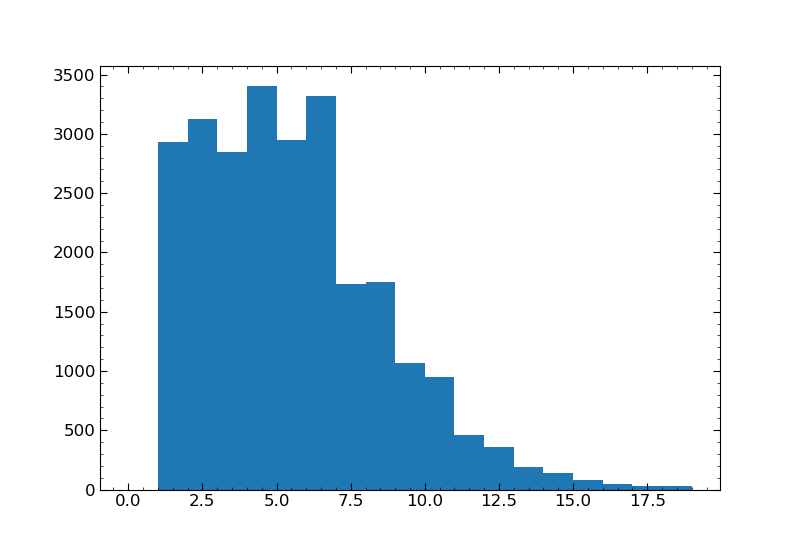

In [19]:
plt.figure()
plt.hist(obj_counts_g,bins=np.arange(0,20))

***
Now let's explore the dependence of the PA1 metric on the minimum number of detections specified in the configs. For this, we have generated different collections for each value of minimum number of detections e.g. N>10 collection = 'u/edennihy/tickets/photrepeat_test_n10'. The default value in the task is N>2

In [20]:
butler = dafButler.Butler('/project/edennihy/auxtelImagingSurveys/data/')
registry = butler.registry

datasets = registry.queryDatasetTypes()
for dataset in datasets:
    print(dataset)

DatasetType('bias', {instrument, detector}, ExposureF, isCalibration=True)
DatasetType('camera', {instrument}, Camera, isCalibration=True)
DatasetType('dark', {instrument, detector}, ExposureF, isCalibration=True)
DatasetType('defects', {instrument, detector}, Defects, isCalibration=True)
DatasetType('flat', {band, instrument, detector, physical_filter}, ExposureF, isCalibration=True)
DatasetType('raw', {band, instrument, detector, physical_filter, exposure}, Exposure)
DatasetType('atlas_refcat2_20220201', {htm7}, SimpleCatalog)
DatasetType('gaia_dr2_20200414', {htm7}, SimpleCatalog)
DatasetType('skyMap', {skymap}, SkyMap)
DatasetType('packages', {}, Packages)
DatasetType('isr_config', {}, Config)
DatasetType('postISRCCD', {band, instrument, detector, physical_filter, exposure}, Exposure)
DatasetType('isr_metadata', {band, instrument, detector, physical_filter, exposure}, TaskMetadata)
DatasetType('isr_log', {band, instrument, detector, physical_filter, exposure}, ButlerLogRecords)
Dat

In [21]:
collections=['u/edennihy/tickets/photrepeat_test_n10']
butler_faro = dafButler.Butler('/project/edennihy/auxtelImagingSurveys/data/',collections=collections)
registry = butler_faro.registry

In [22]:
PAmetric_i = butler_faro.get('metricvalue_info_PA1MatchedTable',band='i',skymap='at_discrete_v2',tract=0,collections=collections)

In [23]:
PAmetric_g = butler_faro.get('metricvalue_info_PA1MatchedTable',band='g',skymap='at_discrete_v2',tract=0,collections=collections)

In [24]:
PAmetric_r = butler_faro.get('metricvalue_info_PA1MatchedTable',band='r',skymap='at_discrete_v2',tract=0,collections=collections)

In [25]:
print('Photometric repetability in g-band %s mmag'%np.round(PAmetric_g.quantity.value,decimals=2))
print('Photometric repetability in r-band %s mmag'%np.round(PAmetric_r.quantity.value,decimals=2))
print('Photometric repetability in i-band %s mmag'%np.round(PAmetric_i.quantity.value,decimals=2))

Photometric repetability in g-band 70.9 mmag
Photometric repetability in r-band 52.62 mmag
Photometric repetability in i-band 61.59 mmag


In [26]:
PAmetric_g.extras.keys()

dict_keys(['count', 'mean_mag', 'rms'])

In [27]:
PAmetric_i.extras.keys()

dict_keys(['count', 'mean_mag', 'rms'])

In [28]:
rms_i_extras_n10 = PAmetric_i.extras['rms']
rms_g_extras_n10 = PAmetric_g.extras['rms']
rms_r_extras_n10 = PAmetric_r.extras['rms']

Text(0, 0.5, 'Counts per bin')

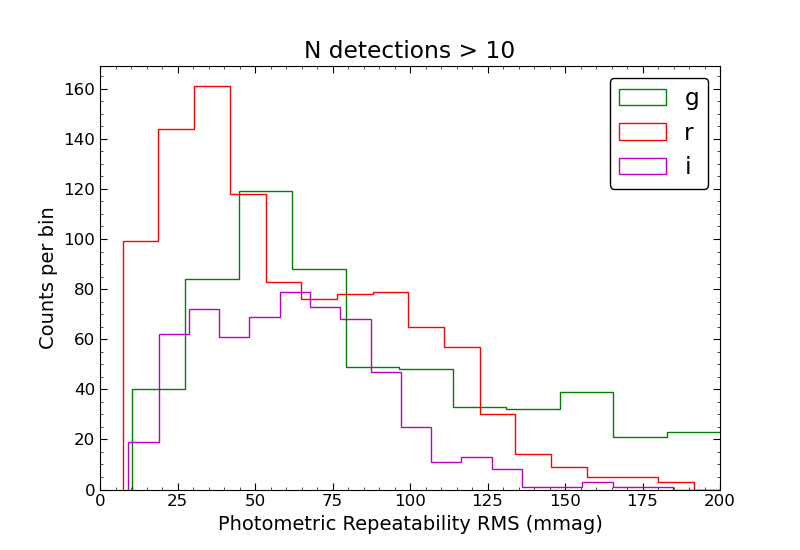

In [32]:
plt.figure()
plt.clf()
_ = plt.hist(rms_g_extras_n10.quantity.value,bins='fd',color='g',label='g',histtype='step')
_ = plt.hist(rms_r_extras_n10.quantity.value,bins='fd',color='r',label='r',histtype='step')
_ = plt.hist(rms_i_extras_n10.quantity.value,bins='fd',color='m',label='i',histtype='step')
plt.legend()
plt.title('N detections > 10')
plt.xlim(0,200)
plt.xlabel('Photometric Repeatability RMS (mmag)')
plt.ylabel('Counts per bin')

In [35]:
collections=['u/edennihy/tickets/photrepeat_test_n2']
butler_faro = dafButler.Butler('/project/edennihy/auxtelImagingSurveys/data/',collections=collections)
registry = butler_faro.registry

In [36]:
PAmetric_i = butler_faro.get('metricvalue_info_PA1MatchedTable',band='i',skymap='at_discrete_v2',tract=0,collections=collections)

In [37]:
PAmetric_g = butler_faro.get('metricvalue_info_PA1MatchedTable',band='g',skymap='at_discrete_v2',tract=0,collections=collections)

In [38]:
PAmetric_r = butler_faro.get('metricvalue_info_PA1MatchedTable',band='r',skymap='at_discrete_v2',tract=0,collections=collections)

In [39]:
print('Photometric repetability in g-band %s mmag'%np.round(PAmetric_g.quantity.value,decimals=2))
print('Photometric repetability in r-band %s mmag'%np.round(PAmetric_r.quantity.value,decimals=2))
print('Photometric repetability in i-band %s mmag'%np.round(PAmetric_i.quantity.value,decimals=2))

Photometric repetability in g-band 37.21 mmag
Photometric repetability in r-band 23.78 mmag
Photometric repetability in i-band 23.38 mmag


In [40]:
PAmetric_g.extras.keys()

dict_keys(['count', 'mean_mag', 'rms'])

In [41]:
PAmetric_i.extras.keys()

dict_keys(['count', 'mean_mag', 'rms'])

In [42]:
rms_i_extras_n2 = PAmetric_i.extras['rms']
rms_g_extras_n2 = PAmetric_g.extras['rms']
rms_r_extras_n2 = PAmetric_r.extras['rms']

Text(0, 0.5, 'Counts per bin')

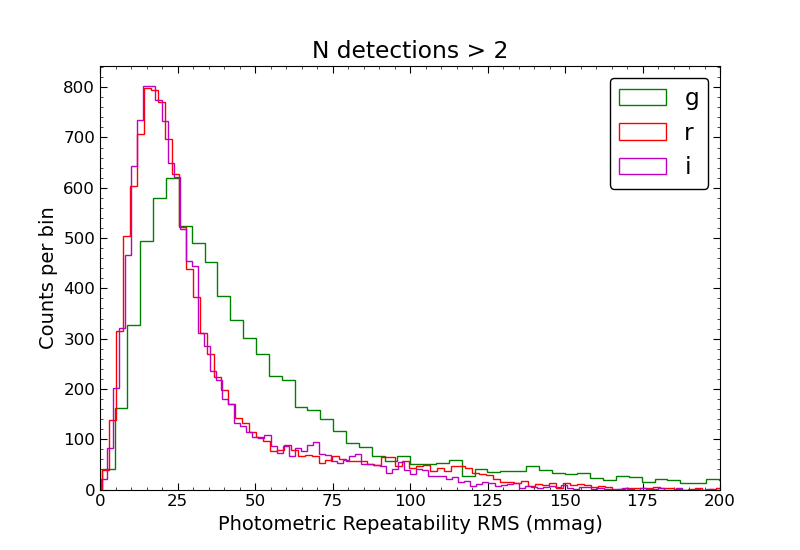

In [43]:
plt.figure()
plt.clf()
_ = plt.hist(rms_g_extras_n2.quantity.value,bins='fd',color='g',label='g',histtype='step')
_ = plt.hist(rms_r_extras_n2.quantity.value,bins='fd',color='r',label='r',histtype='step')
_ = plt.hist(rms_i_extras_n2.quantity.value,bins='fd',color='m',label='i',histtype='step')
plt.legend()
plt.title('N detections > 2')
plt.xlim(0,200)
plt.xlabel('Photometric Repeatability RMS (mmag)')
plt.ylabel('Counts per bin')